## Nearest Neighbor item based Collaborative Filtering

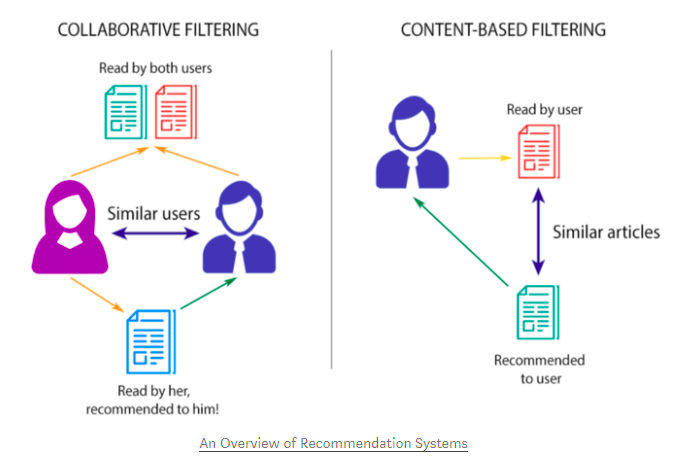

https://github.com/krishnaik06/Recommendation_complete_tutorial/tree/master/KNN%20Movie%20Recommendation

In [41]:
import pandas as pd
import numpy as np

In [42]:
##Dataset url: https://grouplens.org/datasets/movielens/latest/
movies_df = pd.read_csv('data/movies.csv',usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [43]:
ratings_df = pd.read_csv('data/ratings.csv',usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})
ratings_df.head()

,userId,movieId,rating
0,1,1,4.000
1,1,3,4.000
2,1,6,4.000
3,1,47,5.000
4,1,50,5.000


In [44]:
df = pd.merge(ratings_df, movies_df, on="movieId")
df.head()

,userId,movieId,rating,title
0,1,1,4.000,Toy Story (1995)
1,5,1,4.000,Toy Story (1995)
2,7,1,4.500,Toy Story (1995)
3,15,1,2.500,Toy Story (1995)
4,17,1,4.500,Toy Story (1995)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37756 entries, 0 to 37755
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   37756 non-null  int32  
 1   movieId  37756 non-null  int32  
 2   rating   37755 non-null  float32
 3   title    37756 non-null  object 
dtypes: float32(1), int32(2), object(1)
memory usage: 1.0+ MB


In [46]:
df.describe()

,userId,movieId,rating
count,37756.000,37756.000,37755.000
mean,126.820,19596.772,3.581
std,74.915,36462.938,1.025
min,1.000,1.000,0.500
25%,64.000,1080.000,3.000
50%,122.000,2804.000,4.000
75%,197.000,7445.000,4.000
max,256.000,193587.000,5.000


In [47]:
df.isna().sum()

userId     0
movieId    0
rating     1
title      0
dtype: int64

In [48]:
df = pd.merge(ratings_df,movies_df, on='movieId')
df.head()

,userId,movieId,rating,title
0,1,1,4.000,Toy Story (1995)
1,5,1,4.000,Toy Story (1995)
2,7,1,4.500,Toy Story (1995)
3,15,1,2.500,Toy Story (1995)
4,17,1,4.500,Toy Story (1995)


In [49]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])
combine_movie_rating.head()

,userId,movieId,rating,title
0,1,1,4.000,Toy Story (1995)
1,5,1,4.000,Toy Story (1995)
2,7,1,4.500,Toy Story (1995)
3,15,1,2.500,Toy Story (1995)
4,17,1,4.500,Toy Story (1995)


In [50]:
print(type(combine_movie_rating.groupby('title')['rating'].count()))
combine_movie_rating.groupby('title')['rating'].count()

<class 'pandas.core.series.Series'>


title
'Til There Was You (1997)                                  1
'Tis the Season for Love (2015)                            1
'burbs, The (1989)                                         6
(500) Days of Summer (2009)                               21
00 Schneider - Jagd auf Nihil Baxter (1994)                1
                                                          ..
anohana: The Flower We Saw That Day - The Movie (2013)     1
eXistenZ (1999)                                            5
xXx (2002)                                                13
xXx: State of the Union (2005)                             1
¡Three Amigos! (1986)                                     13
Name: rating, Length: 6138, dtype: int64

In [51]:
print(type(combine_movie_rating.groupby('title')['rating'].count().reset_index()))
combine_movie_rating.groupby('title')['rating'].count().reset_index()

<class 'pandas.core.frame.DataFrame'>


,title,rating
0,'Til There Was You (1997),1
1,'Tis the Season for Love (2015),1
2,"'burbs, The (1989)",6
3,(500) Days of Summer (2009),21
4,00 Schneider - Jagd auf Nihil Baxter (1994),1
...,...,...
6133,anohana: The Flower We Saw That Day - The Movi...,1
6134,eXistenZ (1999),5
6135,xXx (2002),13
6136,xXx: State of the Union (2005),1


In [53]:
movie_rating_count = combine_movie_rating.groupby('title')['rating'].count().reset_index().rename(columns = {'rating':'totalRatingCount'})[['title', 'totalRatingCount']]
movie_rating_count.head()

,title,totalRatingCount
0,'Til There Was You (1997),1
1,'Tis the Season for Love (2015),1
2,"'burbs, The (1989)",6
3,(500) Days of Summer (2009),21
4,00 Schneider - Jagd auf Nihil Baxter (1994),1


In [54]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),92
1,5,1,4.000,Toy Story (1995),92
2,7,1,4.500,Toy Story (1995),92
3,15,1,2.500,Toy Story (1995),92
4,17,1,4.500,Toy Story (1995),92


In [36]:
# Above step can also b done in below ways
combine_movie_rating.merge(movie_rating_count, on = 'title')

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),92
1,5,1,4.0,Toy Story (1995),92
2,7,1,4.5,Toy Story (1995),92
3,15,1,2.5,Toy Story (1995),92
4,17,1,4.5,Toy Story (1995),92
...,...,...,...,...,...
37751,254,48883,3.5,Death of a President (2006),1
37752,255,1739,4.0,3 Ninjas: High Noon On Mega Mountain (1998),1
37753,255,2907,4.0,Superstar (1999),1
37754,255,3929,2.0,"Bank Dick, The (1940)",1


In [39]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
movies_df.describe()

,movieId
count,9742.000
mean,42200.354
std,52160.495
min,1.000
25%,3248.250
50%,7300.000
75%,76232.000
max,193609.000


In [40]:
popularity_threshold = 50
rating_popular_movie = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),92
1,5,1,4.000,Toy Story (1995),92
2,7,1,4.500,Toy Story (1995),92
3,15,1,2.500,Toy Story (1995),92
4,17,1,4.500,Toy Story (1995),92


In [55]:
movies_feature_df = rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movies_feature_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
title,,,,,,,,,,,,,,,,,,,,,
Ace Ventura: Pet Detective (1994),0.000,0.000,0.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.500,0.000,0.000,0.000,0.000,3.500,5.000,0.000
Aladdin (1992),0.000,0.000,0.000,4.000,4.000,5.000,3.000,0.000,0.000,4.000,...,5.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000
Alien (1979),4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,4.500,0.000,0.000,0.000,0.000,4.000,0.000,0.000
Aliens (1986),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.500,0.000,0.000,0.000,0.000,4.000,0.000,0.000
American Beauty (1999),5.000,0.000,0.000,5.000,0.000,0.000,4.000,0.000,0.000,1.000,...,4.000,0.000,4.500,0.000,0.000,0.000,0.000,5.000,1.000,0.000


In [58]:
from scipy.sparse import csc_matrix

movie_features_df_matrix = csc_matrix(movies_feature_df.values)
print(type(movie_features_df_matrix))
print(movie_features_df_matrix[5])

<class 'scipy.sparse.csc.csc_matrix'>
  (0, 4)	3.0
  (0, 5)	4.0
  (0, 6)	4.5
  (0, 7)	4.0
  (0, 10)	5.0
  (0, 13)	4.0
  (0, 16)	3.5
  (0, 25)	3.0
  (0, 28)	4.0
  (0, 32)	3.0
  (0, 34)	5.0
  (0, 36)	5.0
  (0, 37)	4.0
  (0, 39)	5.0
  (0, 41)	5.0
  (0, 42)	5.0
  (0, 44)	5.0
  (0, 46)	3.0
  (0, 51)	4.0
  (0, 52)	3.0
  (0, 54)	3.0
  (0, 55)	4.0
  (0, 60)	3.0
  (0, 65)	3.0
  (0, 67)	4.0
  :	:
  (0, 169)	4.0
  (0, 171)	4.0
  (0, 174)	2.5
  (0, 183)	2.0
  (0, 184)	5.0
  (0, 186)	4.0
  (0, 187)	5.0
  (0, 190)	4.0
  (0, 191)	4.0
  (0, 192)	4.0
  (0, 193)	4.0
  (0, 210)	4.0
  (0, 211)	5.0
  (0, 217)	4.5
  (0, 218)	4.0
  (0, 220)	5.0
  (0, 221)	2.0
  (0, 223)	4.5
  (0, 224)	2.0
  (0, 226)	5.0
  (0, 231)	4.0
  (0, 233)	3.0
  (0, 238)	3.0
  (0, 240)	2.5
  (0, 245)	4.0


In [60]:
# NearestNeighbors is neither classifier nor regressor, its unsupervised algorithm.
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine',algorithm= 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Cos 0 =1, cos 90 = 0

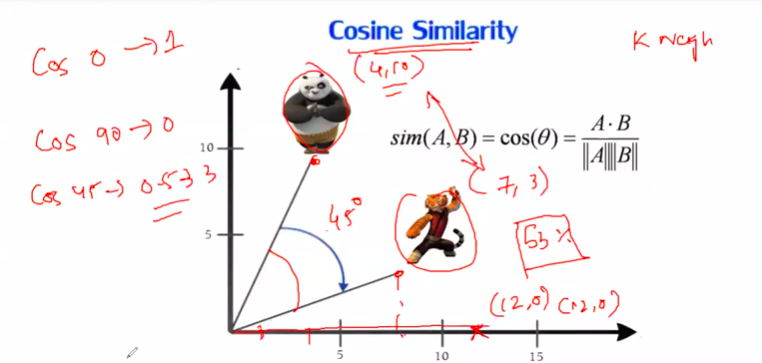

In [62]:
print(movies_feature_df.shape)
print(movies_feature_df.shape[0])

(81, 248)
81


In [64]:
query_index= np.random.choice(movies_feature_df.shape[0])
print(query_index)
print(movies_feature_df.iloc[query_index,:])
print(movies_feature_df.iloc[query_index,:].values)
print(movies_feature_df.iloc[query_index,:].values.reshape(1,-1))
distance, indices = model_knn.kneighbors(movies_feature_df.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

16
userId
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
       ... 
252   0.000
253   0.000
254   0.000
255   0.000
256   0.000
Name: Die Hard: With a Vengeance (1995), Length: 248, dtype: float32
[0.  0.  0.  0.  0.  3.  4.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  4.
 3.  0.  3.5 0.  0.  3.5 0.  4.  0.  0.  4.  0.  4.  0.  0.  0.  0.  0.
 5.  0.  0.  4.  0.  2.  5.  0.  5.  4.  0.  0.  0.  3.  0.  0.  0.  3.
 0.  4.  0.  0.  0.  0.  4.  0.  0.  0.  0.  3.5 0.  0.  5.  4.  0.  0.
 0.  0.  0.  3.  0.  0.  3.  4.  0.  3.  0.  4.  0.  0.  0.  0.  3.  0.
 4.  0.  0.  0.  0.  5.  0.  0.  3.  0.  0.  0.  0.  3.  0.  3.  0.  0.
 0.  0.  0.  0.  3.5 3.  0.  0.  0.  0.  5.  0.  0.  0.  4.  0.  0.  0.
 4.  0.  0.  0.  0.  1.  5.  0.  0.  4.  0.  3.  0.  0.  3.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  3.  4.  0.  0.  4.  0.  3.  3.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  

In [65]:
n = np.array([1,2])
print(n)
print(n.reshape(1,-1))

[1 2]
[[1 2]]


In [69]:
print(distance)
print(indices)
print(distance.flatten())
print(distance.ravel())

[[4.7683716e-07 3.6742890e-01 3.8387287e-01 3.8736004e-01 4.1079390e-01
  4.1235137e-01]]
[[16  0 17 75  5 22]]
[4.7683716e-07 3.6742890e-01 3.8387287e-01 3.8736004e-01 4.1079390e-01
 4.1235137e-01]
[4.7683716e-07 3.6742890e-01 3.8387287e-01 3.8736004e-01 4.1079390e-01
 4.1235137e-01]


In [72]:
for i in range(len(distance.flatten())):
    if i==0:
        print("Recommendation for {0}: \n".format(movies_feature_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movies_feature_df.index[indices.flatten()[i]], distance.flatten()[i]))

Recommendation for Die Hard: With a Vengeance (1995): 

1: Ace Ventura: Pet Detective (1994), with distance of 0.36742889881134033:
2: Dumb & Dumber (Dumb and Dumber) (1994), with distance of 0.3838728666305542:
3: True Lies (1994), with distance of 0.3873600363731384:
4: Apollo 13 (1995), with distance of 0.41079390048980713:
5: Fugitive, The (1993), with distance of 0.4123513698577881:
